# 微软Azure体验

* 本周主要内容：API文档阅读介绍及计算机视觉入门（认知服务）
* 20春_API_人工智能与机器学习_week02
*  电子讲义设计者：许智超，廖汉腾
<br/>
<br/>

----
![azure_cognitive-services](azure_cognitive-services.png)

## Azure 认知服务是什么？
认知服务使每个开发人员无需具备机器学习的专业知识就能接触到 AI。
只需要一个 API 调用，就可以将看、听、说、搜索、理解和加速决策的能力嵌入到应用中。

* 了解客户如何应用认知服务（了解目前使用场景，并回答你还知道哪些认知服务的内容的案例）

    * 1、(金融业)KPMG 可帮助金融机构节约数百万美元的合规费用
        * KPMG 使用认知服务来转录和编录数千个小时的呼叫，降低其客户的符合性成本最多可达 80%。  
  ![KPMG](KPMG.png)
  
    -------
    * 2、(汽车行业)大众汽车通过实时翻译与全球客户互动 
        * 大众汽车使用认知服务进行高质量的实时翻译，使公司能够更好地与全球客户群合作。
    ![Volks](Volks.png)
    
    -------
    * 3、(打车应用)Uber 通过面部识别提高平台安全性
        * Uber 使用认知服务来防止欺诈，帮助确保使用该应用的司机与档案中的账户匹配。
    ![Uber](Uber.png)  
    
    -------
    * 4、(工业)矿山运营商通过应用自定义计算机影像功能提升可持续性
        * Minsur 利用认知服务更密切地监测其将污染水转化为农业资源的过程的可持续性。
     ![Minsur](Minsur.png)
     
    -------
    * 5、(政府)西雅图反奴隶贸易组织通过云端大规模打击人口贩卖和拯救生命
        * 这个非营利组织利用认知服务，帮助志趣相投的组织与人口贩运受害者建立联系，致力于消除剥削，拯救生命。
    

微软Azure API 目录：[认知服务目录](https://azure.microsoft.com/zh-cn/services/cognitive-services/) 或登入之后找 AI + Machine Learning

<br/>
<br/>


## 复习

* 上周主要内容： 
    * 1、API文档
    * 2、认知服务-人脸识别
    * 3、pandas黑魔法（json_normalize）
-----
* 提问、检查与扩展：
    * 1、上周的Azure face API随机检查2位同学，对于API文档是否有能力详细阅读？
    * 2、抽查2位同学，对于获取的数据用途有何思考？是否尝试其他平台（XXX API、XXX API）
    * 3、我们尝试抽取了4张图片，包含AB、ABC、BCD、ABCD四个人物特征，检查数据差异


<br/>
<br/>

## 本周内容及学习目标


* 1、人脸识别的 API比较 
* 2、人脸识别的偏差及API 政治经济学 
* 3、学习并完成所有Azure computer version 的API调用（可演示1-2个，剩余作为课堂练习）


## 学生权限

* [访问学生权益](https://azure.microsoft.com/zh-cn/education/)
![student_edu](student_edu.png)

In [1]:
%%html
<style>
/* 本电子讲义使用之CSS */
div.code_cell {
    background-color: #e5f1fe;
}
div.cell.selected {
    background-color: #effee2;
    font-size: 2rem;
    line-height: 2.4rem;
}
div.cell.selected .rendered_html table {
    font-size: 2rem !important;
    line-height: 2.4rem !important;
}
.rendered_html pre code {
    background-color: #C4E4ff;   
    padding: 2px 25px;
}
.rendered_html pre {
    background-color: #99c9ff;
}
div.code_cell .CodeMirror {
    font-size: 2rem !important;
    line-height: 2.4rem !important;
}
.rendered_html img, .rendered_html svg {
    max-width: 50%;
    height: auto;
    float: center;
}
/* Gradient transparent - color - transparent */
hr {
    border: 0;
    border-bottom: 1px dashed #ccc;
}
.emoticon{
    font-size: 5rem;
    line-height: 4.4rem;
    text-align: center;
    vertical-align: middle;
}

</style>

# 回顾人脸（人脸识别数据扩展）

* 我们先回顾上节课的基本内容，并获取到图片的基本数据，学会使用  [jsonviewer.stack.hu(json转换检查数据)](http://jsonviewer.stack.hu)

## 快速回顾上节：面部检测（易）

* Azure face API 面部检测

In [20]:
import requests
import json

# set to your own subscription key value
subscription_key = "c5bacc55b62841a589a58aa1250fb66d"
assert subscription_key

# replace <My Endpoint String> with the string from your endpoint URL
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

# 请求正文
image_url = 'http://newmedia.nfu.edu.cn/wcy/wp-content/uploads/2018/04/post_20180424__NFU_DoraHacks_imoji%E5%9B%A2%E9%98%9F.jpg'

headers = {'Ocp-Apim-Subscription-Key': subscription_key}

# 请求参数
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    # 可选参数,请仔细阅读API文档
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

response = requests.post(face_api_url, params=params,
                         headers=headers, json={"url": image_url})
# json.dumps 将json--->字符串
json.dumps(response.json())

'[{"faceId": "b5be2cee-2012-4ff7-92a2-1e62181a43fb", "faceRectangle": {"top": 118, "left": 144, "width": 88, "height": 88}, "faceAttributes": {"smile": 0.813, "headPose": {"pitch": -3.4, "roll": 1.4, "yaw": 9.4}, "gender": "male", "age": 18.0, "facialHair": {"moustache": 0.1, "beard": 0.1, "sideburns": 0.1}, "glasses": "NoGlasses", "emotion": {"anger": 0.0, "contempt": 0.003, "disgust": 0.0, "fear": 0.0, "happiness": 0.813, "neutral": 0.184, "sadness": 0.0, "surprise": 0.0}, "blur": {"blurLevel": "low", "value": 0.21}, "exposure": {"exposureLevel": "overExposure", "value": 0.81}, "noise": {"noiseLevel": "low", "value": 0.01}, "makeup": {"eyeMakeup": false, "lipMakeup": false}, "accessories": [], "occlusion": {"foreheadOccluded": false, "eyeOccluded": false, "mouthOccluded": false}, "hair": {"bald": 0.18, "invisible": false, "hairColor": [{"color": "brown", "confidence": 0.95}, {"color": "black", "confidence": 0.93}, {"color": "other", "confidence": 0.23}, {"color": "blond", "confidence

In [21]:
results = response.json()
results

[{'faceId': 'b5be2cee-2012-4ff7-92a2-1e62181a43fb',
  'faceRectangle': {'top': 118, 'left': 144, 'width': 88, 'height': 88},
  'faceAttributes': {'smile': 0.813,
   'headPose': {'pitch': -3.4, 'roll': 1.4, 'yaw': 9.4},
   'gender': 'male',
   'age': 18.0,
   'facialHair': {'moustache': 0.1, 'beard': 0.1, 'sideburns': 0.1},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.003,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.813,
    'neutral': 0.184,
    'sadness': 0.0,
    'surprise': 0.0},
   'blur': {'blurLevel': 'low', 'value': 0.21},
   'exposure': {'exposureLevel': 'overExposure', 'value': 0.81},
   'noise': {'noiseLevel': 'low', 'value': 0.01},
   'makeup': {'eyeMakeup': False, 'lipMakeup': False},
   'accessories': [],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.18,
    'invisible': False,
    'hairColor': [{'color': 'brown', 'confidence': 0.95},
     {'color': 'black', 

In [22]:
import pandas as pd

In [23]:
df = pd.json_normalize(results)

In [24]:
print(df["faceId"].values)

['b5be2cee-2012-4ff7-92a2-1e62181a43fb'
 '72780717-aa88-4f17-b8ed-b0d381f73e2c'
 '0e6d80f0-cde3-43bb-9fc3-92800f2696ca'
 'cbc50736-345b-4e76-a20f-f4ea9a5f4d2a'
 'f5ce3ee4-5ef1-432f-a93d-abf9e0f15dd9'
 '0b24fec6-0ad0-4cbb-8c9d-87089785611e']


In [25]:
df.columns

Index(['faceId', 'faceRectangle.top', 'faceRectangle.left',
       'faceRectangle.width', 'faceRectangle.height', 'faceAttributes.smile',
       'faceAttributes.headPose.pitch', 'faceAttributes.headPose.roll',
       'faceAttributes.headPose.yaw', 'faceAttributes.gender',
       'faceAttributes.age', 'faceAttributes.facialHair.moustache',
       'faceAttributes.facialHair.beard',
       'faceAttributes.facialHair.sideburns', 'faceAttributes.glasses',
       'faceAttributes.emotion.anger', 'faceAttributes.emotion.contempt',
       'faceAttributes.emotion.disgust', 'faceAttributes.emotion.fear',
       'faceAttributes.emotion.happiness', 'faceAttributes.emotion.neutral',
       'faceAttributes.emotion.sadness', 'faceAttributes.emotion.surprise',
       'faceAttributes.blur.blurLevel', 'faceAttributes.blur.value',
       'faceAttributes.exposure.exposureLevel',
       'faceAttributes.exposure.value', 'faceAttributes.noise.noiseLevel',
       'faceAttributes.noise.value', 'faceAttributes.m

In [26]:
# 可观察其中指数
df[['faceId','faceAttributes.glasses','faceAttributes.emotion.neutral','faceAttributes.age','faceAttributes.gender']]

,faceId,faceAttributes.glasses,faceAttributes.emotion.neutral,faceAttributes.age,faceAttributes.gender
0,b5be2cee-2012-4ff7-92a2-1e62181a43fb,NoGlasses,0.184,18.0,male
1,72780717-aa88-4f17-b8ed-b0d381f73e2c,NoGlasses,0.542,20.0,female
2,0e6d80f0-cde3-43bb-9fc3-92800f2696ca,ReadingGlasses,0.000,23.0,male
3,cbc50736-345b-4e76-a20f-f4ea9a5f4d2a,NoGlasses,0.000,21.0,female
4,f5ce3ee4-5ef1-432f-a93d-abf9e0f15dd9,ReadingGlasses,0.019,17.0,female
5,0b24fec6-0ad0-4cbb-8c9d-87089785611e,NoGlasses,0.000,19.0,female


## 试一试：人脸验证(难)

人脸相似度？有没有试下？

* API人脸文档中最重要的组成部分：
   
    * Request URL？
    * Http Method？
    * 参数？

----
* 不同的人脸对比数据
    * 人脸验证关键数据？
    * 根据哪些数据证明是同一个人？
    
----
* 具体步骤：
    * 1、Create 请求成功200 返回空字符串
    * 2、Add face 请求成功200 返回persistedFaceId
    * 3、Detect 准备 被检测人 人脸的id
    * 4、Find similars 返回相似置信度
    * 附加：get查看facelists
    

In [142]:
# 1、create
create_facelists_url = "https://westcentralus.api.cognitive.microsoft.com/face/v1.0/facelists/{faceListId}" 
subscription_key = "9c7af7b847274ae1aba6c1d86b8c6770"
assert subscription_key
headers = {
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': subscription_key,
}
data = {
    "name": "sample_list",
    "userData": "User-provided data attached to the face list.",
    "recognitionModel": "recognition_02"
}
params = {
    # Request parameters    
   
    "faceListId":"xu_test_03"
    
#     'detectionModel': 'detection_01',
}

r_create = requests.put(create_facelists_url,headers=headers,params=params,json=data)

In [143]:
# 请求成功，返回空字符串
r_create.status_code

200

In [146]:
# 2、Add face
add_face_url ="https://westcentralus.api.cognitive.microsoft.com/face/v1.0/facelists/{faceListId}/persistedFaces"
subscription_key = "9c7af7b847274ae1aba6c1d86b8c6770"
assert subscription_key
headers = {
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': subscription_key,
}
img_url = "http://newmedia.nfu.edu.cn/wp-content/uploads/members/Wang_Zijia.jpg"

params_add_face={
    "faceListId":"xu_test_02"
}

r_add_face = requests.post(add_face_url,headers=headers,params=params_add_face,json={"url":img_url})
# r = requests.post(add_face, headers=headers,params = params,json={"url": add_face_image})
# r.status_code

In [147]:
r_add_face.content

b'{"persistedFaceId":"a01b4583-041e-4e32-8684-66bd85ad40cc"}'

In [190]:
# 3、检测人脸的id


# replace <My Endpoint String> with the string from your endpoint URL
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

# 请求正文
image_url = 'http://newmedia.nfu.edu.cn/wp-content/uploads/members/Wang_Zijia.jpg'

headers = {'Ocp-Apim-Subscription-Key': subscription_key}

# 请求参数
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    # 选择model
    'recognitionModel':'recognition_02',
    'detectionModel':'detection_01',
    # 可选参数,请仔细阅读API文档
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

response = requests.post(face_api_url, params=params,
                         headers=headers, json={"url": image_url})
# json.dumps 将json--->字符串
json.dumps(response.json())

'[{"faceId": "91135155-18d8-43f9-96e3-d897fc6d30fc", "faceRectangle": {"top": 101, "left": 128, "width": 123, "height": 123}, "faceAttributes": {"smile": 0.956, "headPose": {"pitch": -1.5, "roll": -6.0, "yaw": 19.9}, "gender": "female", "age": 20.0, "facialHair": {"moustache": 0.0, "beard": 0.0, "sideburns": 0.0}, "glasses": "NoGlasses", "emotion": {"anger": 0.0, "contempt": 0.001, "disgust": 0.0, "fear": 0.0, "happiness": 0.956, "neutral": 0.042, "sadness": 0.0, "surprise": 0.002}, "blur": {"blurLevel": "medium", "value": 0.48}, "exposure": {"exposureLevel": "goodExposure", "value": 0.61}, "noise": {"noiseLevel": "low", "value": 0.0}, "makeup": {"eyeMakeup": true, "lipMakeup": false}, "accessories": [], "occlusion": {"foreheadOccluded": false, "eyeOccluded": false, "mouthOccluded": false}, "hair": {"bald": 0.12, "invisible": false, "hairColor": [{"color": "black", "confidence": 1.0}, {"color": "brown", "confidence": 0.6}, {"color": "other", "confidence": 0.59}, {"color": "gray", "conf

In [191]:
#4、Find similars

findsimilars_url = "https://westcentralus.api.cognitive.microsoft.com/face/v1.0/findsimilars"

# 请求正文 faceId需要先检测一张照片获取
data_findsimilars = {
    "faceId":"91135155-18d8-43f9-96e3-d897fc6d30fc",
    "faceListId":"xu_test_02",
    "maxNumOfCandidatesReturned": 10,
    "mode": "matchPerson"
    }

r_findsimilars = requests.post(findsimilars_url,headers=headers,json=data_findsimilars)

In [192]:
r_findsimilars.status_code

200

In [193]:
r_findsimilars.content

b'[{"persistedFaceId":"a01b4583-041e-4e32-8684-66bd85ad40cc","confidence":1.0}]'

In [187]:
# Get facelist
get_facelist_url = "https://westcentralus.api.cognitive.microsoft.com/face/v1.0/facelists/{faceListId}"

data = {
    "faceListId":"xu_test_02",

}

r_get_facelist = requests.get(get_facelist_url,headers=headers,params=data)

In [188]:
r_get_facelist.status_code

200

In [189]:
r_get_facelist.content

b'{"persistedFaces":[{"persistedFaceId":"a01b4583-041e-4e32-8684-66bd85ad40cc","userData":null}],"faceListId":"xu_test_02","name":"sample_list","userData":"User-provided data attached to the face list."}'

# 人脸识别的 API比较

* [Face Off: Confronting Bias in Face Recognition AI](https://www.kairos.com/blog/face-off-confronting-bias-in-face-recognition-ai)

----
* [为什么世界现在需要道德的面部识别](https://www.kairos.com/blog/why-the-world-needs-ethical-facial-recognition-now)
    * 到2023年，全球人脸识别市场的价值估计接近100亿美元，复合年增长率为16.8％。市场背后的主要增长动力是监视市场的发展以及生物识别技术领域的政府支出。但是，面部识别的使用在其他领域也有很大贡献，例如帮助企业打击消费者欺诈，满足动态法规遵从性以及提供可获利的客户体验。

-----


# 人脸识别的偏差及API 政治经济学 

* [对抗：面对面部识别AI中的偏见](https://www.kairos.com/blog/face-off-confronting-bias-in-face-recognition-ai)
    * 发生了什么？
        * “编码注视”或算法偏差的研究: 浅肤色男性的错误率为0.8％ ?  深色皮肤女性的错误率高达34.7％  ? (Microsoft，IBM和Face ++)
    * 用户的反应范围从惊奇和赞美到不悦和冒犯
        * 我们承认目前提供的种族分类（黑人，白人，亚裔，西班牙裔，其他则不足以代表丰富多样，发展迅速的文化和种族挂毯
    * 该怎么办？
        * 改善数据
        * 寻求持续的反馈

----
* [科技行业没有应对面部识别偏见的计划](https://www.theverge.com/2018/7/26/17616290/facial-recognition-ai-bias-benchmark-test)

    * 公司在做什么？(一些高科技大公司支持基准和法规)
    * 我们如何解决偏见问题？
    * 偏差不是唯一的问题
 ![警察识别罪犯](Identify_criminals.png)   
----

* [面部识别尚未准备好给执法部门使用](https://techcrunch.com/2018/06/25/facial-recognition-software-is-not-ready-for-use-by-law-enforcement/)
    

    

# 学习并完成所有Azure computer version 的API调用

## 分析远程图像

{"categories": [{"name": "outdoor_", "score": 0.04296875, "detail": {"landmarks": []}}, {"name": "outdoor_waterside", "score": 0.37109375, "detail": {"landmarks": []}}], "color": {"dominantColorForeground": "Grey", "dominantColorBackground": "Grey", "dominantColors": ["Grey"], "accentColor": "2473A7", "isBwImg": false, "isBWImg": false}, "description": {"tags": ["outdoor", "building", "mountain", "grass", "house", "train", "water", "small", "background", "track", "town", "boat", "going", "green", "city", "old", "traveling", "river", "driving", "tall", "bus", "large", "white", "surrounded", "sitting", "street", "lake", "double", "hill", "decker", "group", "parked", "red", "field", "grazing", "blue", "clock", "horse", "sign", "riding", "docked"], "captions": [{"text": "a building with a mountain in the background", "confidence": 0.9770334984021007}]}, "requestId": "00ed88a2-00cf-494c-ba6b-9955a8c1fcda", "metadata": {"width": 600, "height": 400, "format": "Jpeg"}}


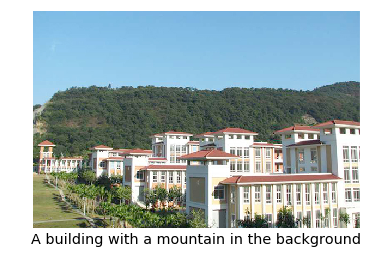

In [9]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
import json
from PIL import Image
from io import BytesIO

# Add your Computer Vision subscription key and endpoint to your environment variables.
# if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
#     subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
# else:
#     print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
#     sys.exit()

endpoint = "https://westcentralus.api.cognitive.microsoft.com/"
# if 'COMPUTER_VISION_ENDPOINT' in os.environ:
#     endpoint = os.environ['COMPUTER_VISION_ENDPOINT']
subscription_key = "8192a0de854b47719534a1e59d668f2a"
analyze_url = endpoint+ "vision/v2.1/analyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "http://wcy.nfu.edu.cn/uploads/allimg/180423/1-1P423204500H9.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}
response = requests.post(analyze_url, headers=headers,
                         params=params, json=data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(json.dumps(response.json()))
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()

## 分析本地图片


{'categories': [{'name': 'people_group', 'score': 0.96484375}], 'color': {'dominantColorForeground': 'White', 'dominantColorBackground': 'Green', 'dominantColors': ['White', 'Black', 'Green'], 'accentColor': '304966', 'isBwImg': False, 'isBWImg': False}, 'description': {'tags': ['grass', 'person', 'outdoor', 'group', 'people', 'building', 'standing', 'young', 'child', 'posing', 'field', 'boy', 'front', 'large', 'soccer', 'man', 'grassy', 'park', 'game', 'green', 'woman', 'playing', 'crowd', 'holding', 'flying', 'ball', 'city'], 'captions': [{'text': 'a group of people standing in front of a crowd posing for the camera', 'confidence': 0.966873824232646}]}, 'requestId': '863a75f2-3bfb-4115-8713-f821255decc7', 'metadata': {'width': 700, 'height': 400, 'format': 'Jpeg'}}


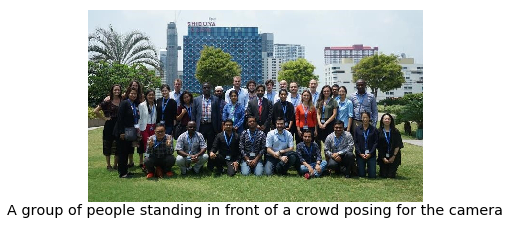

In [6]:
import os
import sys
import requests
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Add your Computer Vision subscription key and endpoint to your environment variables.
# if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
#     subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
# else:
#     print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
#     sys.exit()

# if 'COMPUTER_VISION_ENDPOINT' in os.environ:
#     endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

# analyze_url = endpoint + "vision/v2.1/analyze"

# Set image_path to the local path of an image that you want to analyze.
image_path = "201803_Bangkok_workshop_group.jpg"

# Read the image into a byte array
image_data = open(image_path, "rb").read()
headers = {'Ocp-Apim-Subscription-Key': subscription_key,
           'Content-Type': 'application/octet-stream'}
params = {'visualFeatures': 'Categories,Description,Color'}
response = requests.post(
    analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(analysis)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(image_data))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)

## 生成缩略图

想把图片压缩

Thumbnail is 100-by-100


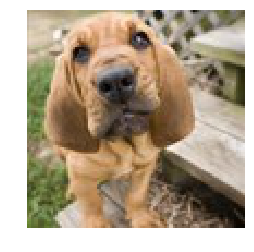

In [16]:
import os
import sys
import requests
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Add your Computer Vision subscription key and endpoint to your environment variables.
# if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
#     subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
# else:
#     print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
#     sys.exit()

# if 'COMPUTER_VISION_ENDPOINT' in os.environ:
#     endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

thumbnail_url = endpoint + "vision/v2.1/generateThumbnail"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://upload.wikimedia.org/wikipedia/commons/9/94/Bloodhound_Puppy.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'width': '100', 'height': '100', 'smartCropping': 'true'}
data = {'url': image_url}
response = requests.post(thumbnail_url, headers=headers,
                         params=params, json=data)
response.raise_for_status()

thumbnail = Image.open(BytesIO(response.content))

# Display the thumbnail.
plt.imshow(thumbnail)
plt.axis("off")

# Verify the thumbnail size.
print("Thumbnail is {0}-by-{1}".format(*thumbnail.size))

## 提取印刷体文本和手写文本 （学生演练）

* 假如我们抓取了1000张网页，出了文本信息我们分析以外，还有每个页面的图片的信息，我们可以用提取图片文本的方式，将图片的信息也抓取下来
* 我们进抓取了图片，想知道这些图片的内容是什么，也可以用提取文本的方式进行提取
* ....

## Python 使用域模型（学生演练）